In [1]:
from keras.datasets.mnist import load_data
# ((訓練圖片, 訓練答案), (測試圖片, 測試答案))
(x_train, y_train), (x_test, y_test) = load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


In [2]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


答案是: 7


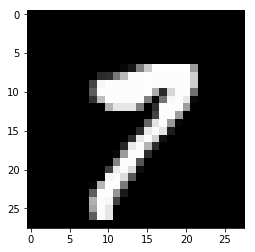

In [3]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
c = random.randint(0, 59999)
print("答案是:", y_train[c])
plt.imshow(x_train[c], cmap="gray")

In [4]:
import pandas as pd
pd.DataFrame(x_train[c])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,7,24,128,202,253,253,253,253,255,154,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,43,47,120,186,252,252,253,252,252,252,252,253,206,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,68,246,253,252,252,252,252,253,252,252,252,252,253,206,0,0,0,0,0,0


In [11]:
from keras.models import Sequential
from keras.layers import Dense
mlp = Sequential()
# 784 * 256 + 256(bias)
mlp.add(Dense(256, activation="relu", input_dim=784))
# 256 * 10 + 10(bias)
mlp.add(Dense(10, activation="softmax"))
mlp.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [0]:
# 1: sigmoid + binary_crossentropy
# >2: softmax + categorical_crossentropy
mlp.compile(loss="categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

In [13]:
from keras.utils.np_utils import to_categorical
# 圖片: 攤平 -> 0~1 (配合一開始的隨機weights)
x_train_reshape = x_train.reshape(60000, 784) / 255
x_test_reshape = x_test.reshape(10000, 784) / 255
# 答案: One-hot encoding
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
# batch_size: 看多少筆再調整
# epochs: 整本書要看幾遍(控制模型最好的重要關鍵)
mlp.fit(x_train_reshape, y_train_cat,
        batch_size=200,
        epochs=10,
        validation_split=0.1,
        verbose=2)

In [15]:
mlp.evaluate(x_test_reshape, y_test_cat)

10000/10000 [==============================] - 0s 35us/step


[0.06921511044078507, 0.9786]

In [0]:
from sklearn.metrics import confusion_matrix
import pandas as pd
pre = mlp.predict_classes(x_test_reshape)
pd.DataFrame(confusion_matrix(y_test, pre))

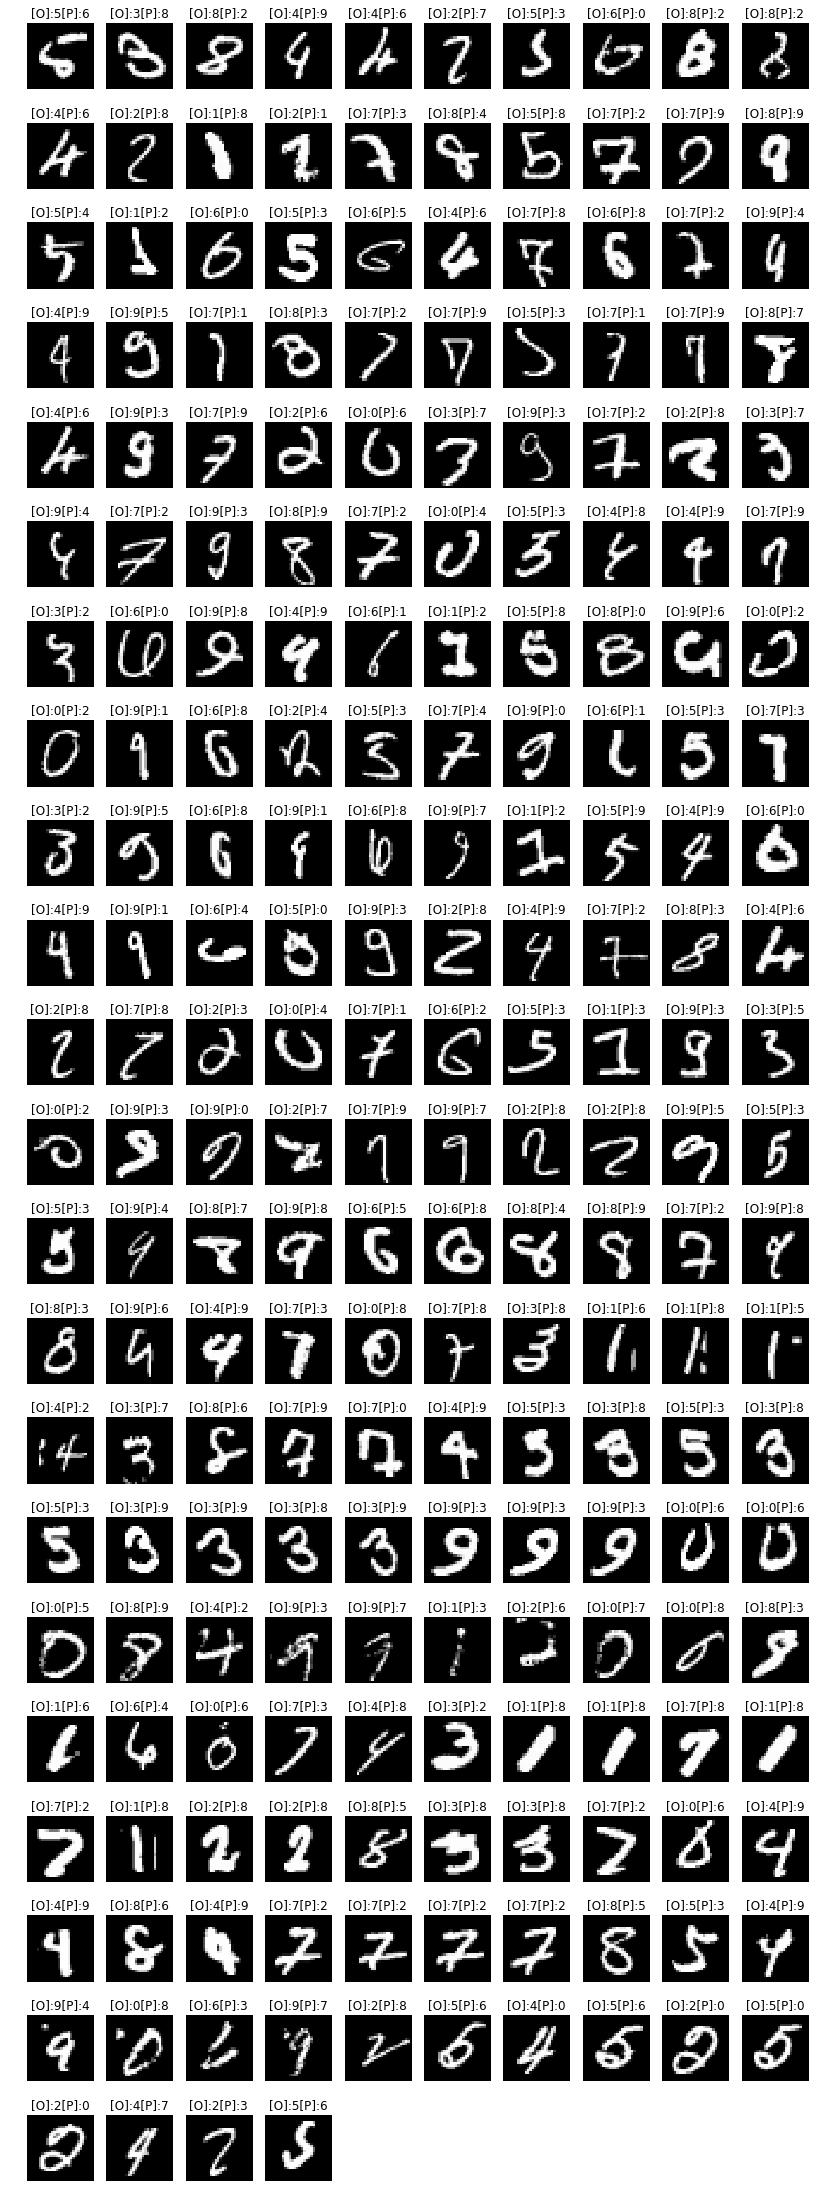

In [27]:
import numpy as np
idx = np.nonzero(pre != y_test)[0]
false_img = x_test[idx]
false_ori_label = y_test[idx]
false_pre_label = pre[idx]
width = 10
height = len(false_img) // width + 1
plt.figure(figsize=(14, 40))
for i, img in enumerate(false_img):
    plt.subplot(height, width, i + 1)
    msg = "[O]:" + str(false_ori_label[i]) + "[P]:" + str(false_pre_label[i])
    plt.title(msg)
    plt.axis("off")
    plt.imshow(img, cmap="gray")
    